<a href="https://colab.research.google.com/github/Ankuraxz/CanisData/blob/master/Dataprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/stevenpeutz/misinformation-fake-news-text-dataset-79k/code?resource=download

In [13]:
!ls

sample_data


# Final Version


In [1]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Canis/data_feature.csv', encoding='utf-8')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78588 entries, 0 to 78587
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   text                                  78588 non-null  object 
 1   label                                 78588 non-null  int64  
 2   text_without_stopwords                78588 non-null  object 
 3   vader_score                           78588 non-null  float64
 4   sentiment                             78588 non-null  int64  
 5   cluster                               78588 non-null  int64  
 6   no_of_sentences_original_news         78588 non-null  int64  
 7   avg_word_count_sentencewise_original  78588 non-null  float64
 8   word_count_nostopwords                78588 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 5.4+ MB


In [8]:
df.head(10)

,text,label,text_without_stopwords,vader_score,sentiment,cluster,no_of_sentences_original_news,avg_word_count_sentencewise_original,word_count_nostopwords
0,The head of a conservative Republican faction ...,0,head conservative Republican faction U.S. Cong...,0.9857,1,1,30,29.333333,880
1,Transgender people will be allowed for the fir...,0,Transgender people allowed first time enlist U...,0.9488,1,0,13,34.615385,450
2,The special counsel investigation of links bet...,0,special counsel investigation links Russia Pre...,-0.6808,0,1,17,30.470588,518
3,Trump campaign adviser George Papadopoulos tol...,0,Trump campaign adviser George Papadopoulos tol...,-0.2201,0,1,16,27.000000,432
4,President Donald Trump called on the U.S. Post...,0,President Donald Trump called U.S. Postal Serv...,0.5896,1,0,40,24.550000,982
5,The White House said on Friday it was set to k...,0,White House said Friday set kick talks next we...,0.6369,1,1,4,31.500000,126
6,President Donald Trump said on Thursday he bel...,0,President Donald Trump said Thursday believes ...,0.9814,1,1,26,23.846154,620
7,While the Fake News loves to talk about my so-...,0,Fake News loves talk so-called low approval ra...,0.5845,1,0,2,30.000000,60
8,"Together, we are MAKING AMERICA GREAT AGAIN! b...",0,"Together, MAKING AMERICA GREAT AGAIN! bit.ly/2...",0.7290,1,0,2,7.000000,14
9,Alabama Secretary of State John Merrill said h...,0,Alabama Secretary State John Merrill said cert...,0.4767,1,0,2,35.500000,71


In [9]:
# Clean and preprocess the text data
import re
df['text_without_stopwords'] = df['text_without_stopwords'].apply(lambda x: re.sub(r'[^\w\s]|(\b\w{1,3}\b)', '', str(x))) # remove symbols and short words

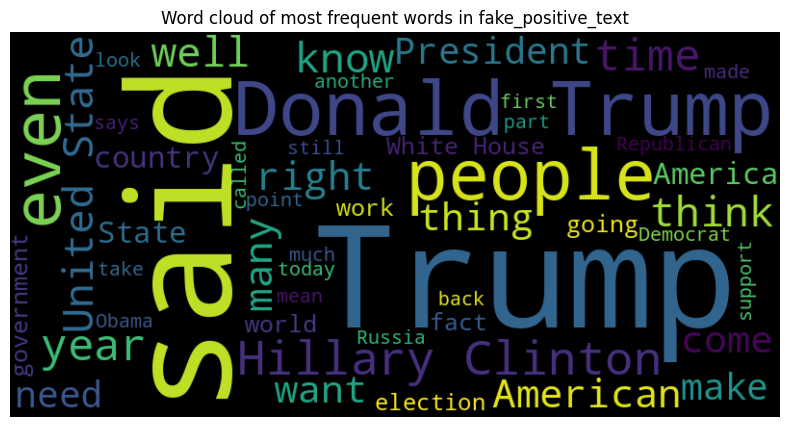

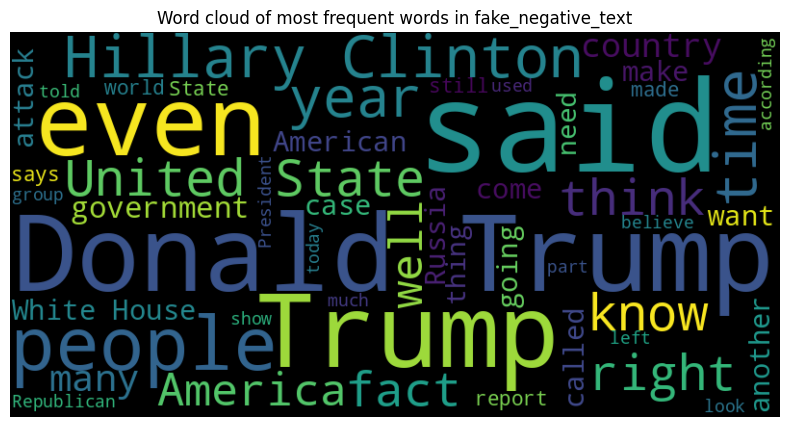

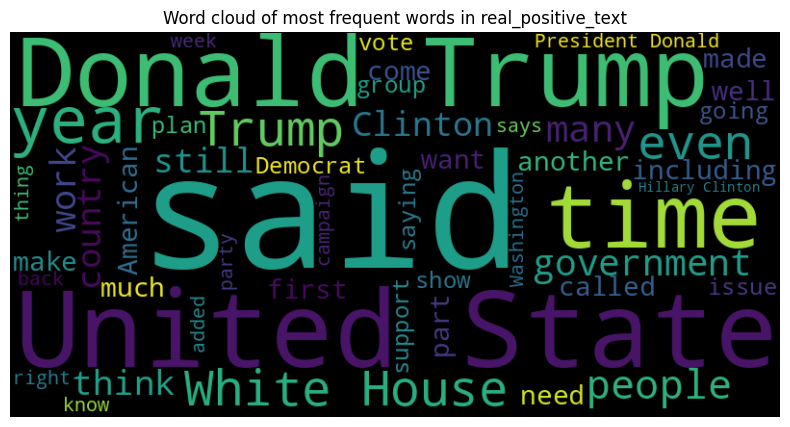

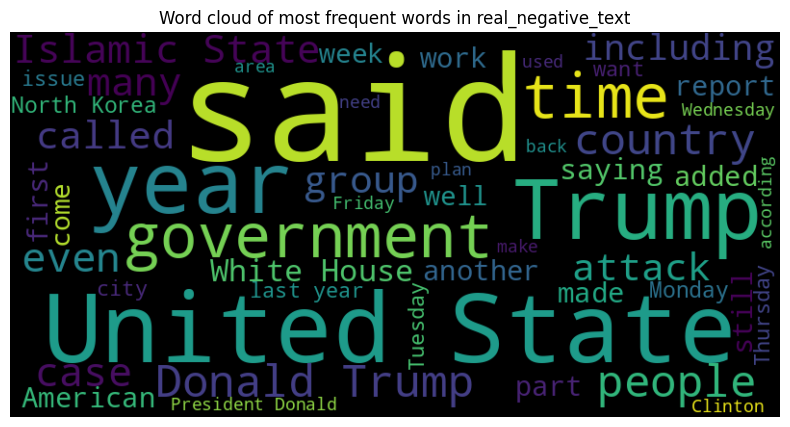

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_positive_text = df[(df['label'] == 1) & (df['sentiment'] == 1)]['text_without_stopwords'].str.cat(sep=' ')
fake_negative_text = df[(df['label'] == 1) & (df['sentiment'] == 0)]['text_without_stopwords'].str.cat(sep=' ')
real_positive_text = df[(df['label'] == 0) & (df['sentiment'] == 1)]['text_without_stopwords'].str.cat(sep=' ')
real_negative_text = df[(df['label'] == 0) & (df['sentiment'] == 0)]['text_without_stopwords'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(fake_positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in fake_positive_text')
plt.show()

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(fake_negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in fake_negative_text')
plt.show()


wordcloud = WordCloud(width=800, height=400, max_words=50).generate(real_positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in real_positive_text')
plt.show()

wordcloud = WordCloud(width=800, height=400, max_words=50).generate(real_negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most frequent words in real_negative_text')
plt.show()

In [16]:
import nltk
import ssl
from nltk import FreqDist
import nltk
import matplotlib.pyplot as plt

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()
# Download stopwords and lemmatizer if needed
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

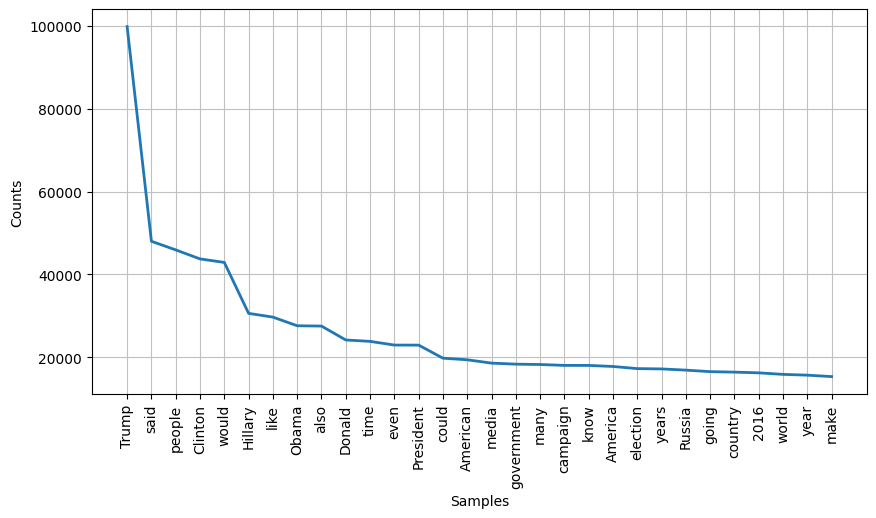

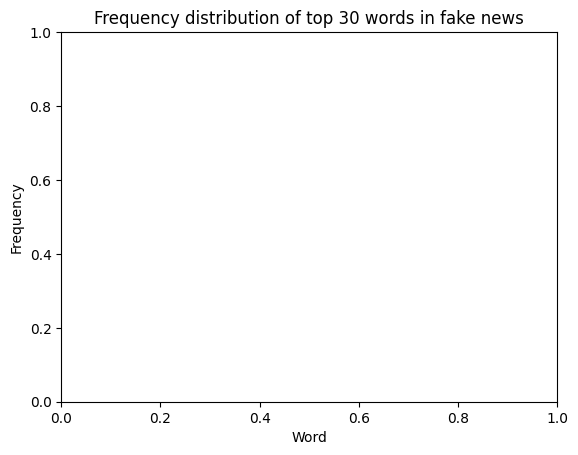

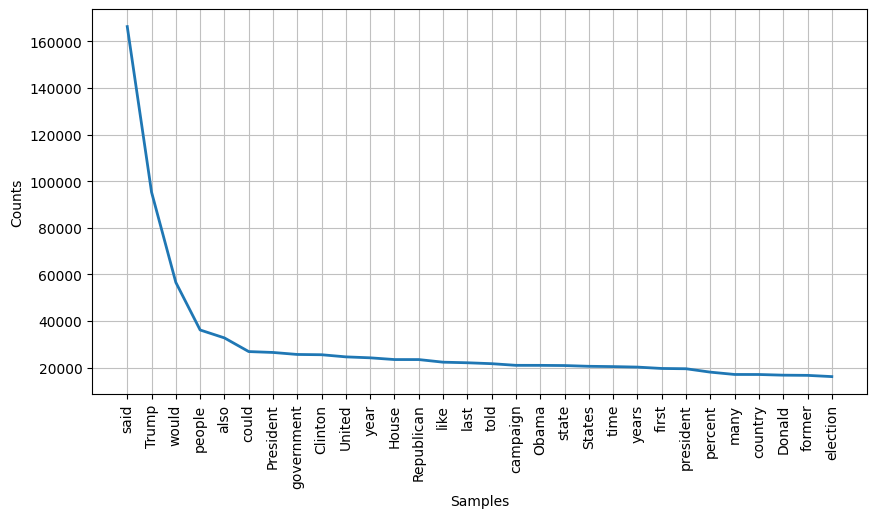

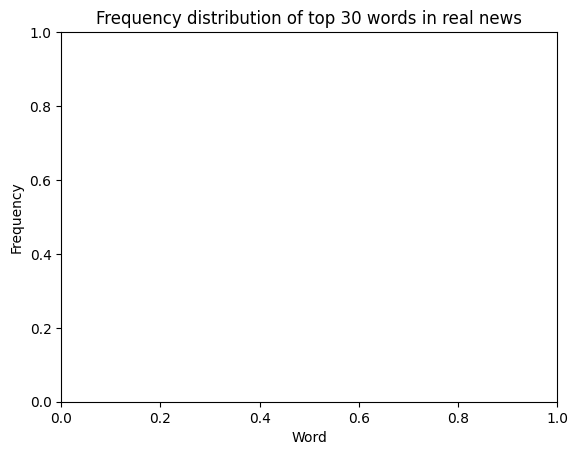

In [17]:
fake_text = df[df['label'] ==1 ]['text_without_stopwords'].str.cat(sep=' ')
real_text = df[df['label'] == 0]['text_without_stopwords'].str.cat(sep=' ')

fake_words = nltk.word_tokenize(fake_text)
real_words = nltk.word_tokenize(real_text)

fake_freq_dist = FreqDist(fake_words)
real_freq_dist = FreqDist(real_words)

plt.figure(figsize=(10,5))
fake_freq_dist.plot(30, cumulative=False)
plt.title('Frequency distribution of top 30 words in fake news')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
real_freq_dist.plot(30, cumulative=False)
plt.title('Frequency distribution of top 30 words in real news')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

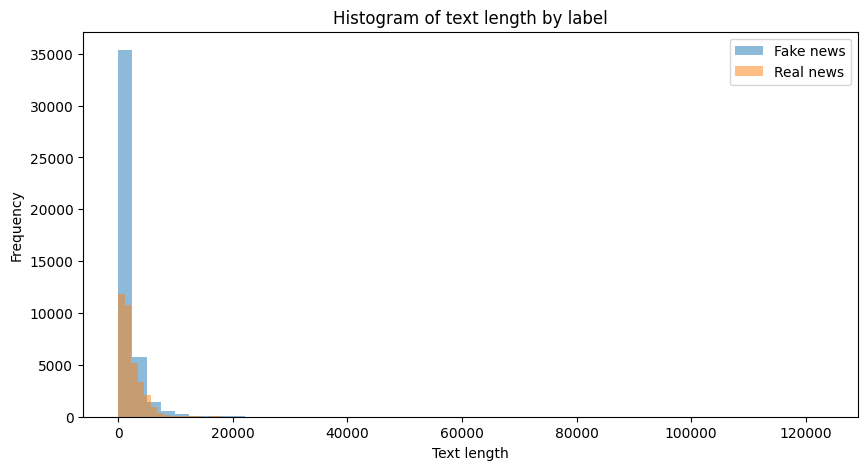

In [18]:
fake_lengths = df[df['label'] == 1]['text_without_stopwords'].apply(lambda x: len(x))
real_lengths = df[df['label'] == 0]['text_without_stopwords'].apply(lambda x: len(x))

plt.figure(figsize=(10,5))
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake news')
plt.hist(real_lengths, bins=50, alpha=0.5, label='Real news')
plt.title('Histogram of text length by label')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

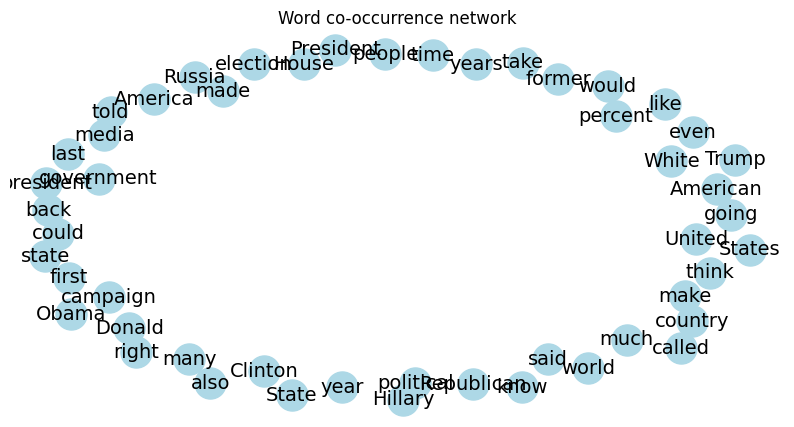

In [19]:
import networkx as nx

text = df['text_without_stopwords'].str.cat(sep=' ')
words = nltk.word_tokenize(text)
freq_dist = FreqDist(words)
top_words = [word[0] for word in freq_dist.most_common(50)]
word_pairs = [(top_words[i], top_words[j]) for i in range(len(top_words)) for j in range(i+1, len(top_words)) if i != j]
word_cooccur = FreqDist(word_pairs)
G = nx.Graph()
for word in top_words:
    G.add_node(word)
for pair, freq in word_cooccur.items():
    if freq > 5:
        G.add_edge(pair[0], pair[1], weight=freq)

plt.figure(figsize=(10,5))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos, node_size=500, node_color='lightblue', edge_color='gray', font_size=14, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Word co-occurrence network')
plt.axis('off')
plt.show()

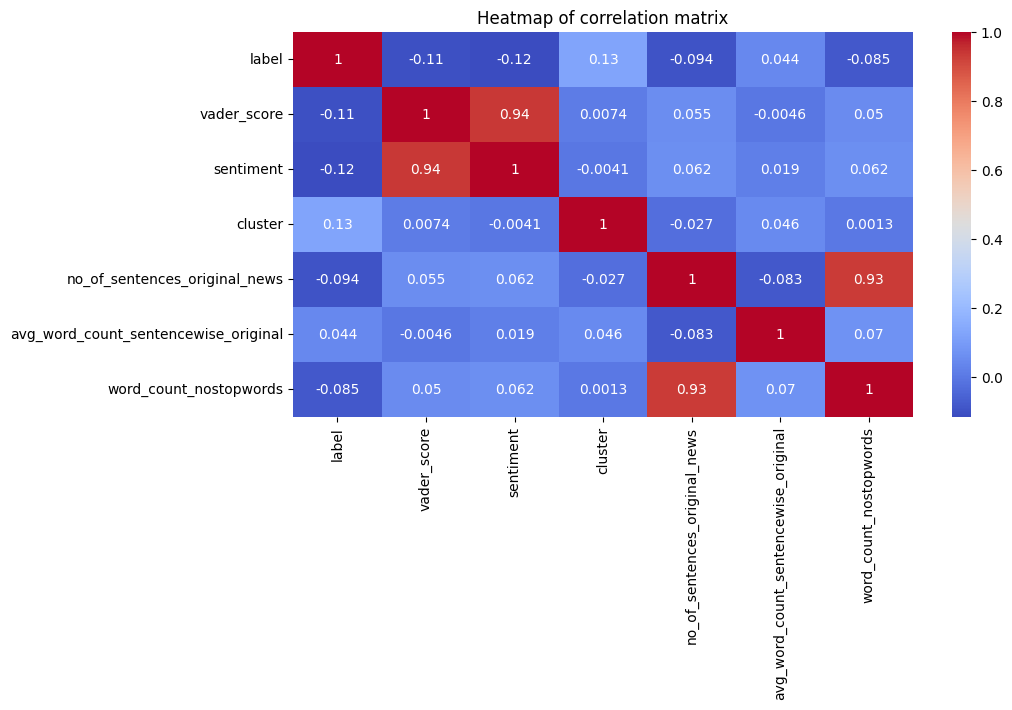

In [20]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation matrix')
plt.show()

In [22]:
# !pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [23]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


def preprocess_text(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

#Preprocess text
preprocessed_text = [preprocess_text(text) for text in df['text_without_stopwords']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(preprocessed_text)
corpus = [dictionary.doc2bow(text) for text in preprocessed_text]

num_topics = 3 #Should be number of Clusters
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')


In [24]:
# Print topics and top words
for topic_id in range(num_topics):
    print(f"Topic {topic_id}: {lda_model.print_topic(topic_id)}\n")

# Visualize topics
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.005*"people" + 0.004*"government" + 0.004*"world" + 0.003*"said" + 0.003*"years" + 0.003*"like" + 0.003*"money" + 0.003*"time" + 0.003*"year" + 0.003*"health"

Topic 1: 0.014*"trump" + 0.010*"clinton" + 0.007*"hillary" + 0.006*"people" + 0.006*"said" + 0.005*"president" + 0.005*"election" + 0.004*"like" + 0.004*"media" + 0.004*"campaign"

Topic 2: 0.012*"russia" + 0.008*"russian" + 0.007*"military" + 0.006*"ukraine" + 0.006*"syria" + 0.005*"said" + 0.005*"government" + 0.004*"united" + 0.004*"states" + 0.004*"world"



/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [25]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# assuming you have already created a gensim LDA model and corpus
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# save the graph as an HTML file
pyLDAvis.save_html(vis_data, 'lda_graph.html')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [26]:
# Save the model
lda_model.save('my_lda_model')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
lda_model.print_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.005*"people" + 0.004*"government" + 0.004*"world" + 0.003*"said" + 0.003*"years" + 0.003*"like" + 0.003*"money" + 0.003*"time" + 0.003*"year" + 0.003*"health"'),
 (1,
  '0.014*"trump" + 0.010*"clinton" + 0.007*"hillary" + 0.006*"people" + 0.006*"said" + 0.005*"president" + 0.005*"election" + 0.004*"like" + 0.004*"media" + 0.004*"campaign"'),
 (2,
  '0.012*"russia" + 0.008*"russian" + 0.007*"military" + 0.006*"ukraine" + 0.006*"syria" + 0.005*"said" + 0.005*"government" + 0.004*"united" + 0.004*"states" + 0.004*"world"')]

# More Viz

In [ ]:
# !pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [28]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TF-IDF vectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, min_df=5)

# Calculate the word occurrences based on TF-IDF scores
word_occurrence = vectorizer.fit_transform(df['text_without_stopwords'])
vocab = vectorizer.vocabulary_.keys()
word_occurrence = pd.DataFrame(word_occurrence.toarray(), columns=vocab)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:



# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# import networkx as nx

# # Dimensionality reduction with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(word_occurrence.T)

# # Create a scatter plot of the text data
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['sentiment'], cmap='coolwarm')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Scatter Plot')
# plt.show()

# # Create a network graph of word co-occurrences
# cooc = word_occurrence.T.dot(word_occurrence)
# G = nx.Graph()
# for i, node_i in enumerate(cooc.index):
#     for j, node_j in enumerate(cooc.columns):
#         if cooc.iloc[i,j] > 0:
#             G.add_edge(node_i, node_j, weight=cooc.iloc[i,j])
# nx.draw_kamada_kawai(G, node_size=100, node_color='lightblue', edge_color='gray', with_labels=True)
# plt.title('Word Co-occurrence Network Graph')
# plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


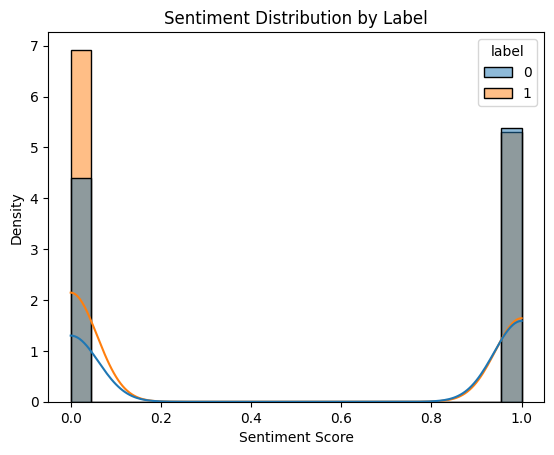

In [31]:
#Sentiment distribution: Similar to vader score, you can use a histogram to show the distribution of sentiment scores. You can also overlay the histogram with density plots for fake and real news

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram with density plots
sns.histplot(data=df, x='sentiment', hue='label', stat="density", kde=True)

# Add title and labels
plt.title('Sentiment Distribution by Label')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')

# Show plot
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


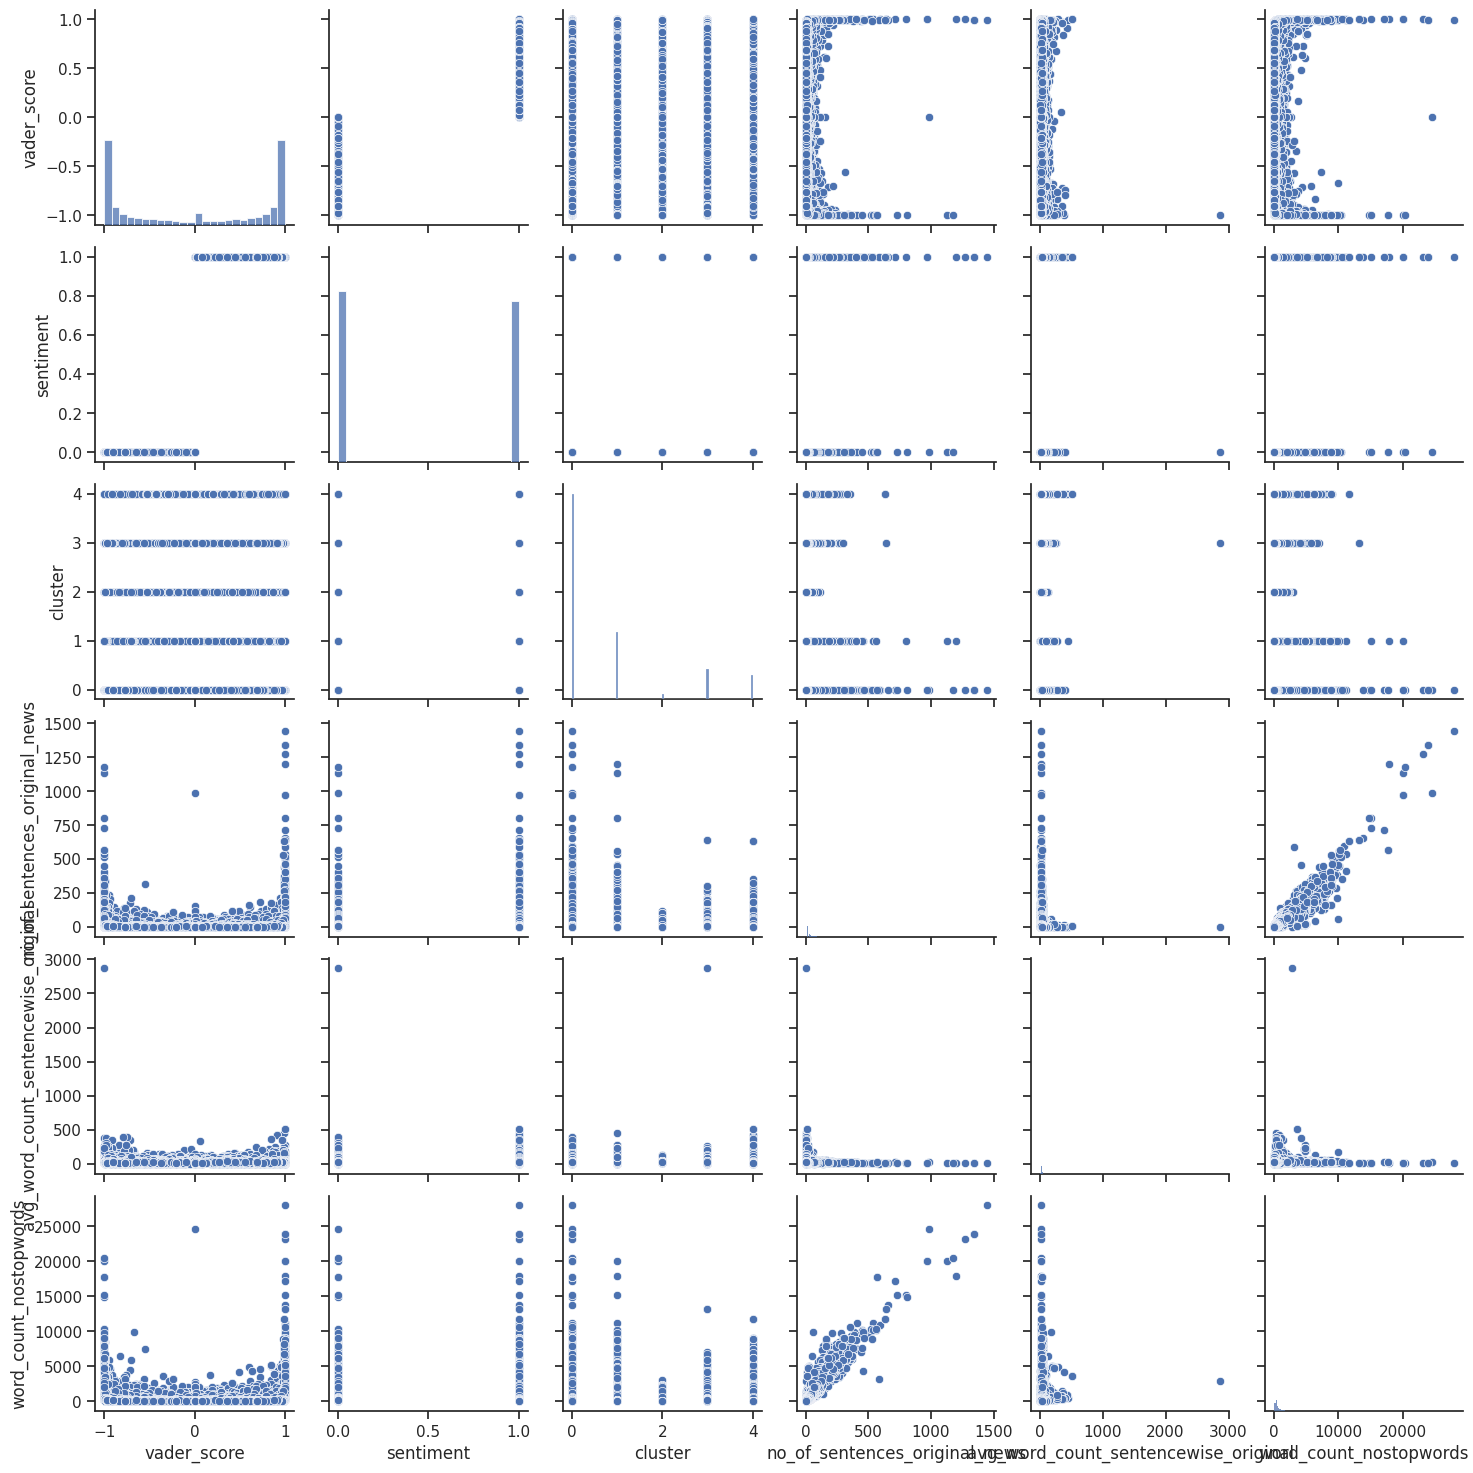

In [32]:
import seaborn as sns

sns.set(style="ticks")

cols = ['vader_score', 'sentiment', 'cluster', 'no_of_sentences_original_news', 'avg_word_count_sentencewise_original', 'word_count_nostopwords']

sns.pairplot(df[cols])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


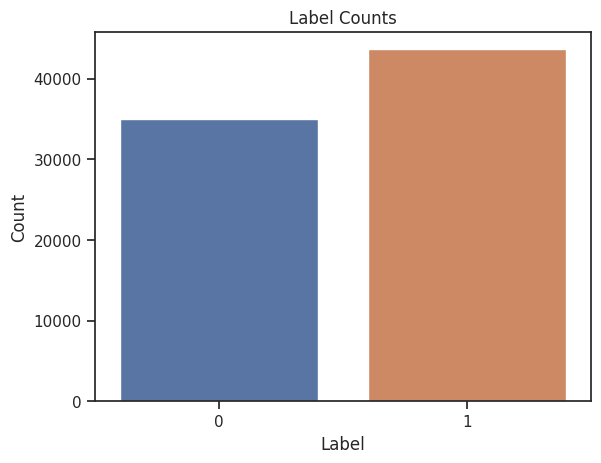

In [33]:
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.show()

## Cluster Based

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


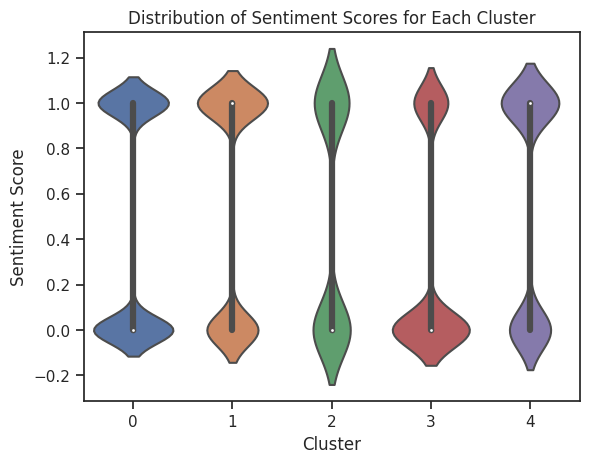

In [34]:
# Create a violin plot of sentiment scores for each cluster
sns.violinplot(x='cluster', y='sentiment', data=df)
plt.xlabel('Cluster')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores for Each Cluster')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


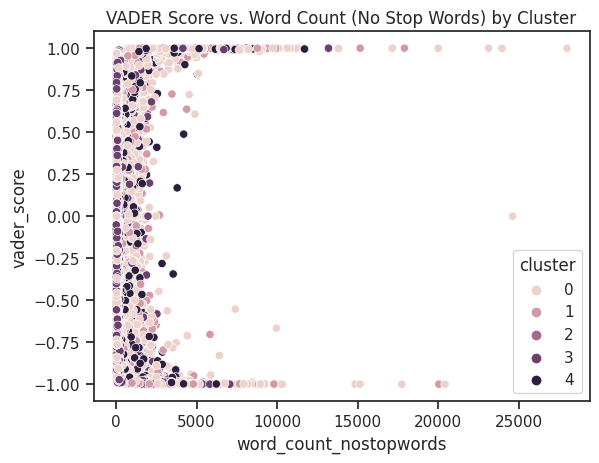

In [35]:
import seaborn as sns

sns.scatterplot(x='word_count_nostopwords', y='vader_score', hue='cluster', data=df)
plt.title('VADER Score vs. Word Count (No Stop Words) by Cluster')
plt.show()

In [37]:
# import matplotlib.pyplot as plt



# # Dimensionality reduction with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(word_occurrence.T)
# # Create a scatter plot of the text data with cluster labels
# plt.figure(figsize=(10, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='coolwarm', alpha=0.5)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA Scatter Plot with Cluster Labels')
# plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from collections import Counter
for label in [0, 1]:
    label_data = df[df['label'] == label]
    word_counts = label_data['text_without_stopwords'].apply(lambda x: Counter(x.split())).sum()
    top_words_by_label[label] = dict(word_counts.most_common(10))

# Create stacked bar chart
top_words_df = pd.DataFrame(top_words_by_label)
top_words_df.plot(kind='bar', stacked=True)
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.title('Top Words by Label')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


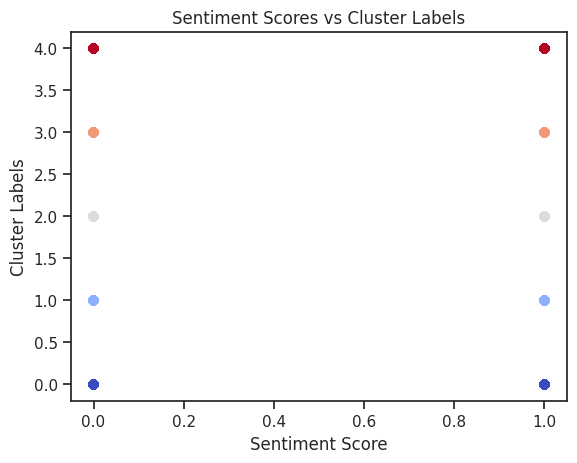

In [40]:
import matplotlib.pyplot as plt

# Create scatter plot of sentiment scores and cluster labels
plt.scatter(df['sentiment'], df['cluster'], c=df['cluster'], cmap='coolwarm')
plt.xlabel('Sentiment Score')
plt.ylabel('Cluster Labels')
plt.title('Sentiment Scores vs Cluster Labels')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


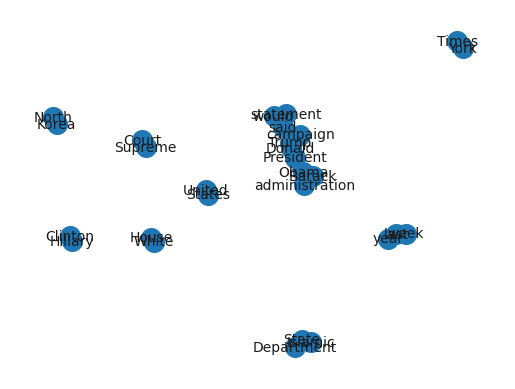

In [41]:
import networkx as nx
from nltk import ngrams
from collections import Counter

# Define the number of top bigrams to keep
num_top_bigrams = 20

# Create a list of all the words in the text data
words = [word for doc in df['text_without_stopwords'] for word in doc.split()]

# Generate a list of bigrams from the list of words
bigrams = ngrams(words, 2)

# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Get the most common bigrams
top_bigrams = bigram_counts.most_common(num_top_bigrams)

# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph
for bigram, count in top_bigrams:
    node1 = bigram[0]
    node2 = bigram[1]
    G.add_node(node1)
    G.add_node(node2)
    
# Add edges to the graph
for bigram, count in top_bigrams:
    node1 = bigram[0]
    node2 = bigram[1]
    G.add_edge(node1, node2, weight=count)

# Define the layout of the graph
pos = nx.spring_layout(G, k=1)

# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Show the graph
plt.axis('off')
plt.show()
